In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (15,5)

In [3]:
df = pd.read_csv("/Users/jakubkielbasiewicz/Downloads/ETH-USD.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-10,3575.020508,3603.244873,3414.970947,3425.852783,3425.852783,16171746693
1,2021-10-11,3419.726807,3622.289551,3385.761719,3545.354004,3545.354004,18579189588
2,2021-10-12,3546.477783,3546.477783,3407.338135,3492.573242,3492.573242,18109578443
3,2021-10-13,3492.753662,3607.741699,3417.602051,3606.201660,3606.201660,16211275589
4,2021-10-14,3604.958984,3819.258545,3590.275146,3786.014160,3786.014160,19443499909


<AxesSubplot: xlabel='Date'>

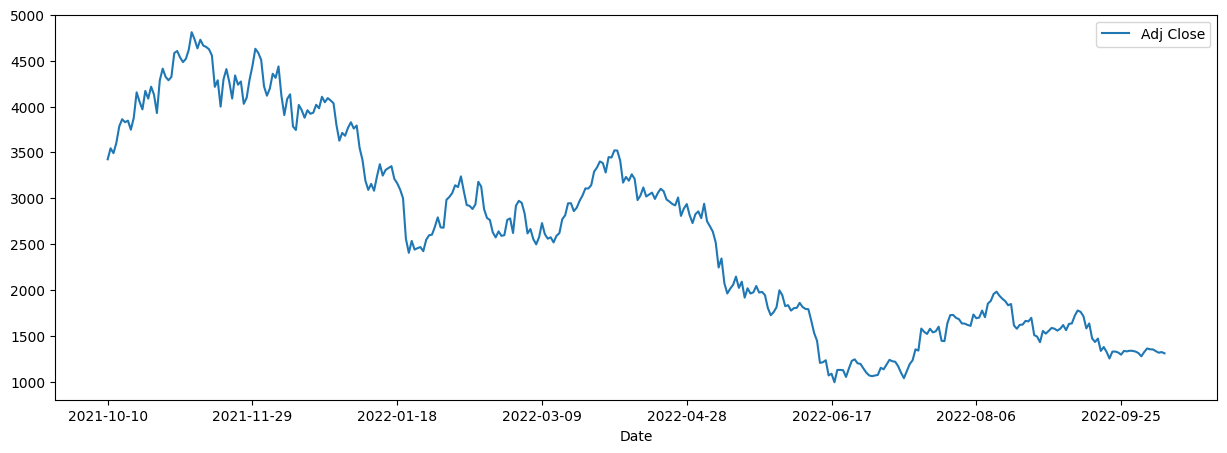

In [13]:
df.plot(x="Date", y="Adj Close", figsize=(15,5))

/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:888: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:888: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


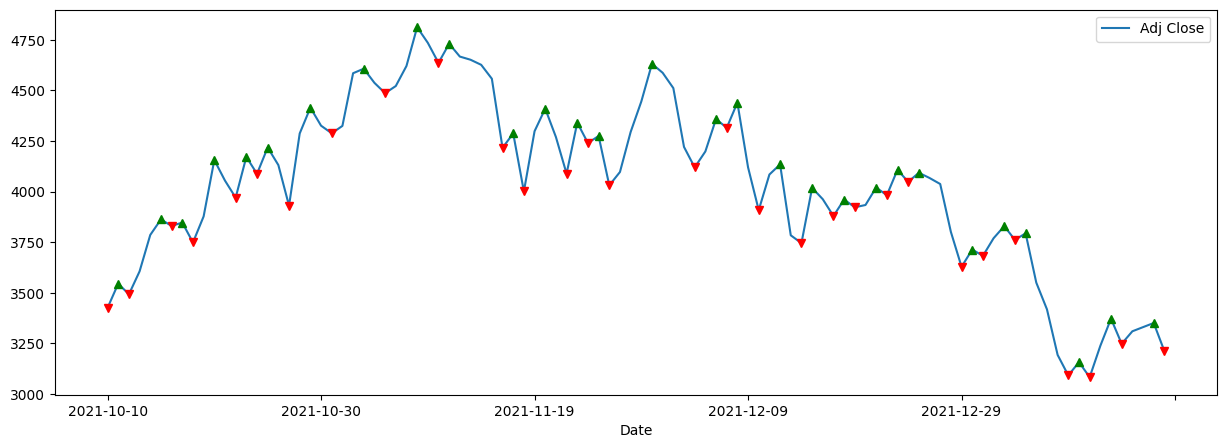

In [40]:
mins = argrelextrema(df[:100]["Adj Close"].values, np.less_equal, order=1)[0]
maxs = argrelextrema(df[:100]["Adj Close"].values, np.greater_equal, order=1)[0]

df[:100].plot(x="Date", y="Adj Close", figsize=(15,5))
df[:100].iloc[mins]["Adj Close"].plot(style=".", lw=10, color="red", marker="v")
df[:100].iloc[maxs]["Adj Close"].plot(style=".", lw=10, color="green", marker="^");

In [19]:
mins[0]

0

In [20]:
maxs[0]

5

In [37]:
prev_end = 0
i = 0
idx = []
for (min_ind, max_ind) in zip(mins, maxs):
    if min_ind != prev_end:
        idx.append((prev_end, min_ind))
        print(f"range: {i}: [{prev_end},{min_ind}]")
        i+=1
    if min_ind != max_ind:
        idx.append((min_ind, max_ind))
        print(f"range: {i}: [{min_ind},{max_ind}]")
        i+=1
        prev_end = max_ind

range: 0: [0,5]
range: 1: [5,8]
range: 2: [8,10]
range: 3: [10,12]
range: 4: [12,15]
range: 5: [15,17]
range: 6: [17,19]
range: 7: [19,21]
range: 8: [21,24]
range: 9: [24,26]
range: 10: [26,29]
range: 11: [29,31]
range: 12: [31,41]
range: 13: [41,39]
range: 14: [39,44]
range: 15: [44,43]
range: 16: [43,51]
range: 17: [51,47]
range: 18: [47,59]
range: 19: [59,55]
range: 20: [55,63]
range: 21: [63,61]
range: 22: [61,66]
range: 23: [66,65]
range: 24: [65,74]
range: 25: [74,68]
range: 26: [68,84]
range: 27: [84,80]
range: 28: [80,94]
range: 29: [94,92]
range: 30: [92,98]
range: 31: [98,104]
range: 32: [104,114]
range: 33: [114,109]
range: 34: [109,122]
range: 35: [122,116]
range: 36: [116,128]
range: 37: [128,126]
range: 38: [126,135]
range: 39: [135,134]
range: 40: [134,142]
range: 41: [142,140]
range: 42: [140,150]
range: 43: [150,148]
range: 44: [148,160]
range: 45: [160,154]
range: 46: [154,170]
range: 47: [170,161]
range: 48: [161,175]
range: 49: [175,172]
range: 50: [172,181]
range: 

In [36]:
for (start, stop) in idx:
    print(df.iloc[start:stop+1]["Adj Close"].values)

[3425.852783 3545.354004 3492.573242 3606.20166  3786.01416  3862.634766]
[3862.634766 3830.38208  3847.104492 3748.760254]
[3748.760254 3877.650879 4155.992188]
[4155.992188 4054.322754 3970.181885]
[3970.181885 4171.663574 4087.903076 4217.876953]
[4217.876953 4131.102051 3930.257324]
[3930.257324 4287.318848 4414.746582]
[4414.746582 4325.650391 4288.074219]
[4288.074219 4324.626953 4584.798828 4607.193848]
[4607.193848 4537.324219 4486.243164]
[4486.243164 4521.581055 4620.554688 4812.087402]
[4812.087402 4735.068848 4636.174316]
[4636.174316 4730.384277 4667.115234 4651.460449 4626.358887 4557.503906
 4216.365234 4287.59375  4000.650879 4298.306641 4409.931152]
[]
[4000.650879 4298.306641 4409.931152 4269.73291  4088.457764 4340.763672]
[]
[4088.457764 4340.763672 4239.981445 4274.743164 4030.908936 4096.912109
 4294.453613 4445.10498  4631.479004]
[]
[4030.908936 4096.912109 4294.453613 4445.10498  4631.479004 4586.990234
 4511.302246 4220.706055 4119.587402 4198.322754 4358.7373

In [41]:
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

In [49]:
# range: 12: [31,41]
xdata = list(range(31,42))
ydata = df.iloc[xdata]["Adj Close"].values
parameters, covariance = curve_fit(Gauss, xdata, ydata)

/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [51]:
covariance

array([[inf, inf],
       [inf, inf]])

In [52]:
from scipy.interpolate import interp1d

In [54]:
interp1d(xdata, ydata)

In [73]:
z = np.polyfit(xdata, ydata, 4)
p = np.poly1d(z)

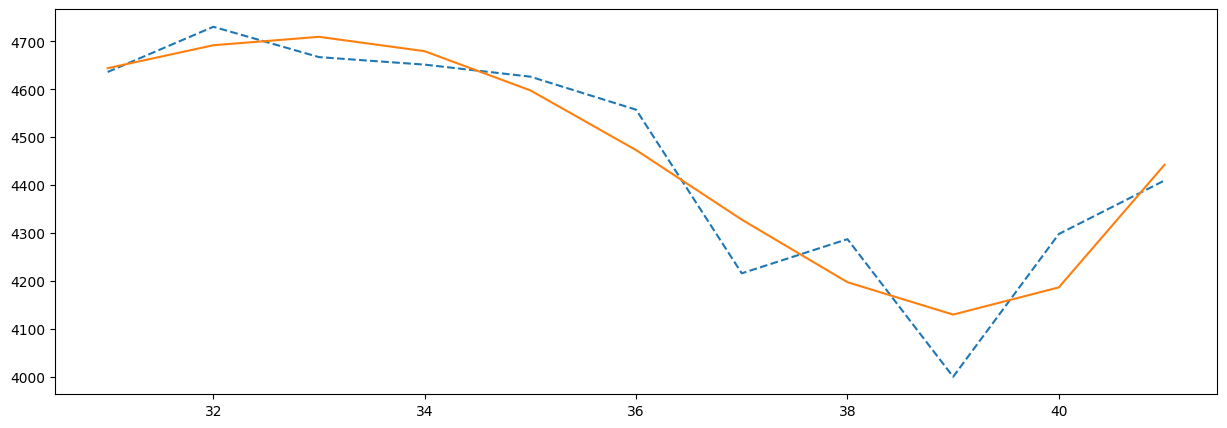

In [74]:
plt.plot(xdata, ydata, '--', xdata, [p(x) for x in xdata], '-');

In [78]:
df['pred'] = 0
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pred
0,2021-10-10,3575.020508,3603.244873,3414.970947,3425.852783,3425.852783,16171746693,0
1,2021-10-11,3419.726807,3622.289551,3385.761719,3545.354004,3545.354004,18579189588,0
2,2021-10-12,3546.477783,3546.477783,3407.338135,3492.573242,3492.573242,18109578443,0
3,2021-10-13,3492.753662,3607.741699,3417.602051,3606.201660,3606.201660,16211275589,0
4,2021-10-14,3604.958984,3819.258545,3590.275146,3786.014160,3786.014160,19443499909,0


In [100]:
for (start, stop) in idx:
    xdata=list(range(start, stop+1))
    if xdata:
        ydata=df.iloc[start:stop+1]["Adj Close"].values
        z = np.polyfit(xdata, ydata, 5)
        p = np.poly1d(z)
        y_fit = p(xdata)
        for i, x in enumerate(xdata):
            df.iat[x, 7] = y_fit[i]
        # print(f"Original: {ydata}")
        # print(f"Pred: {y_fit}")

/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:

In [82]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pred
0,2021-10-10,3575.020508,3603.244873,3414.970947,3425.852783,3425.852783,16171746693,3427.320106
1,2021-10-11,3419.726807,3622.289551,3385.761719,3545.354004,3545.354004,18579189588,3538.017389
2,2021-10-12,3546.477783,3546.477783,3407.338135,3492.573242,3492.573242,18109578443,3507.246471
3,2021-10-13,3492.753662,3607.741699,3417.602051,3606.201660,3606.201660,16211275589,3591.528431
4,2021-10-14,3604.958984,3819.258545,3590.275146,3786.014160,3786.014160,19443499909,3793.350775


/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:888: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/Users/jakubkielbasiewicz/Development/approx/venv3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:888: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


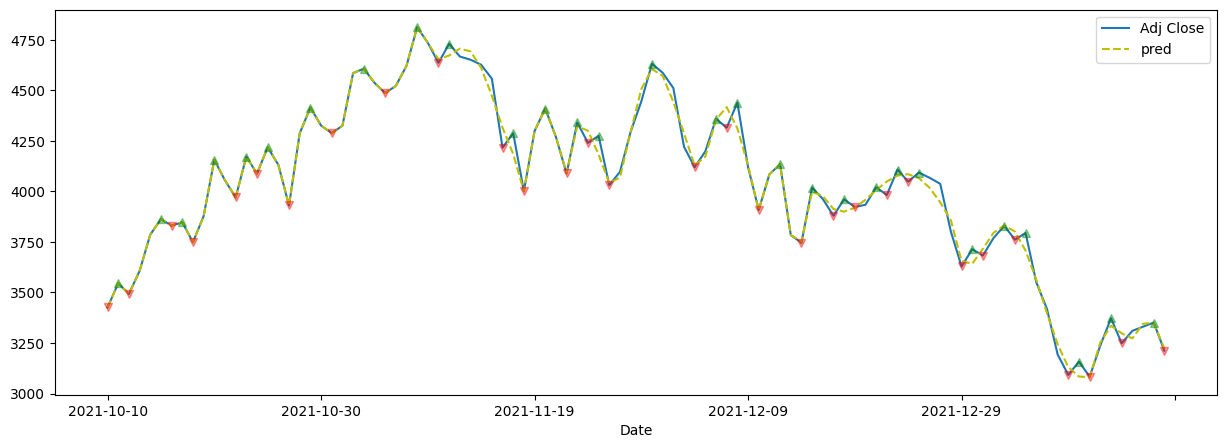

In [101]:
mins = argrelextrema(df[:100]["Adj Close"].values, np.less_equal, order=1)[0]
maxs = argrelextrema(df[:100]["Adj Close"].values, np.greater_equal, order=1)[0]

df[:100].plot(x="Date", y=["Adj Close", "pred"], style=[None, "y--"], figsize=(15,5))
df[:100].iloc[mins]["Adj Close"].plot(style=".", lw=10, color="red", marker="v", alpha=.4)
df[:100].iloc[maxs]["Adj Close"].plot(style=".", lw=10, color="green", marker="^", alpha=.4);